In [4]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file = 'ri_statewide_2020_04_01.csv'
ri = pd.read_csv(file)


/Users/alastairthomson/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1. Do drivers of different genders commit different types of traffic violations?
2. Does gender affect who gets a ticket for speeding?
3. Does the driver's gender affect whether their vehicle is searched or not?
4. Does gender affect who is frisked during a search?
5. Does time of day affect arrest rate?
6. Are drug related stops on the rise?
7. Which zones have the highest stops?
Which zones violations have the highest and lowest search rates?
Does weather affect police behaviour?

Before we do conduct the EDA, the data will need to be verifired to see if it reliable and also cleaned. 


Since these are all of type vehicle, the column is obsolete and we can therefore drop it entirely.

In [6]:
ri.drop('type', inplace=True, axis=1)

In [7]:
ri.outcome.value_counts()

citation    428388
warning      28849
arrest       16603
Name: outcome, dtype: int64

In [8]:
ri.dropna(subset=['subject_race', 'subject_sex'], inplace=True)

In [9]:
ri.isnull().sum()

raw_row_number                0
date                          0
time                          0
zone                          0
subject_race                  0
subject_sex                   0
department_id                 0
arrest_made                   0
citation_issued               0
warning_issued                0
outcome                    6763
contraband_found         462822
contraband_drugs         464596
contraband_weapons       468789
contraband_alcohol       479367
contraband_other         462822
frisk_performed               0
search_conducted              0
search_basis             462822
reason_for_search        462822
reason_for_stop               0
vehicle_make             162525
vehicle_model            250553
raw_BasisForStop              0
raw_OperatorRace              0
raw_OperatorSex               0
raw_ResultOfStop              0
raw_SearchResultOne      462822
raw_SearchResultTwo      479765
raw_SearchResultThree    480416
dtype: int64

In [10]:
ri.dtypes

raw_row_number            int64
date                     object
time                     object
zone                     object
subject_race             object
subject_sex              object
department_id            object
arrest_made              object
citation_issued          object
warning_issued           object
outcome                  object
contraband_found         object
contraband_drugs         object
contraband_weapons       object
contraband_alcohol       object
contraband_other         object
frisk_performed          object
search_conducted           bool
search_basis             object
reason_for_search        object
reason_for_stop          object
vehicle_make             object
vehicle_model            object
raw_BasisForStop         object
raw_OperatorRace         object
raw_OperatorSex          object
raw_ResultOfStop         object
raw_SearchResultOne      object
raw_SearchResultTwo      object
raw_SearchResultThree    object
dtype: object

In [11]:
combined = ri.date.str.cat(ri.time, sep=' ')
ri['date_and_time'] = pd.to_datetime(combined)



In [12]:
ri.set_index('date_and_time', inplace=True)

In [13]:
ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,arrest_made,citation_issued,warning_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
date_and_time,,,,,,,,,,,,,,,,,,,,,
2005-11-22 11:15:00,1,2005-11-22,11:15:00,X3,white,male,200,False,True,False,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2005-10-01 12:20:00,2,2005-10-01,12:20:00,X3,white,male,200,False,True,False,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2005-10-01 12:30:00,3,2005-10-01,12:30:00,X3,white,female,200,False,True,False,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
2005-10-01 12:50:00,4,2005-10-01,12:50:00,X3,white,male,200,False,True,False,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2005-10-01 13:10:00,5,2005-10-01,13:10:00,X3,white,female,200,False,True,False,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [14]:
ri.subject_race.value_counts()

white                     344716
black                      68577
hispanic                   53123
asian/pacific islander     12824
other                       1344
Name: subject_race, dtype: int64

Let''s have a look a each gender

In [15]:
male = ri[ri.subject_sex == 'male']
female = ri[ri.subject_sex == 'female']

In [16]:
male.reason_for_stop.value_counts(normalize=True)

Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.002347
Motorist Assist/Courtesy            0.001880
APB                                 0.001076
Suspicious Person                   0.000767
Warrant                             0.000258
Name: reason_for_stop, dtype: float64

In [17]:
female.reason_for_stop.value_counts(normalize=True)

Speeding                            0.657308
Other Traffic Violation             0.136581
Equipment/Inspection Violation      0.107055
Registration Violation              0.043077
Seatbelt Violation                  0.027071
Call for Service                    0.018057
Special Detail/Directed Patrol      0.005071
Motorist Assist/Courtesy            0.002532
Violation of City/Town Ordinance    0.001647
APB                                 0.000831
Suspicious Person                   0.000564
Warrant                             0.000206
Name: reason_for_stop, dtype: float64

On first glance, speeding takes up a larger proportion of traffic violations for females than males. Although this does not take into count the number of stops for each of the two groups.

Does gender affect who fets a ticket for speeding?

In [18]:
female_and_speeding = ri[(ri.subject_sex == 'female') & (ri.reason_for_stop == 'Speeding')]
male_and_speeding = ri[(ri.subject_sex == 'male') & (ri.reason_for_stop == 'Speeding')]

female_and_speeding.outcome.value_counts(normalize=True)




citation    0.954609
warning     0.039059
arrest      0.006332
Name: outcome, dtype: float64

In [19]:
male_and_speeding.outcome.value_counts(normalize=True)

citation    0.946763
warning     0.036167
arrest      0.017070
Name: outcome, dtype: float64

The proportions of tickets (citation) given to both female and male drivers is nearly identical. With 95.4% nad 94.6%, respectively.

Does the driver's gender affect whether their vehicle is searched?

In [20]:
# search rate across all stops 
ri.raw_SearchResultOne.value_counts()

N    11183
D     4554
A      916
W      390
O      364
M      355
Name: raw_SearchResultOne, dtype: int64

In [21]:
ri.search_conducted.value_counts(normalize=True)

False    0.963041
True     0.036959
Name: search_conducted, dtype: float64

Around 3.6% of stops included a search of the vehicle. Let's now compare across gender.

In [22]:
ri.groupby('subject_sex').search_conducted.mean()


subject_sex
female    0.018751
male      0.043792
Name: search_conducted, dtype: float64

4.3% of males and 0.18% of females have their vehicle searched after the police stop them. Although we need to look at the types of violations comitted to have a better understanding as to why men are being stopped more frequently than women. 

In [23]:
ri.groupby(['reason_for_stop', 'subject_sex']).search_conducted.mean()

reason_for_stop                   subject_sex
APB                               female         0.165138
                                  male           0.255319
Call for Service                  female         0.042230
                                  male           0.092419
Equipment/Inspection Violation    female         0.040245
                                  male           0.070916
Motorist Assist/Courtesy          female         0.033133
                                  male           0.089802
Other Traffic Violation           female         0.038021
                                  male           0.059156
Registration Violation            female         0.054700
                                  male           0.103589
Seatbelt Violation                female         0.017746
                                  male           0.031705
Special Detail/Directed Patrol    female         0.018045
                                  male           0.010249
Speeding                  

Does gender affect who is frisked during a search?

In [24]:
ri['frisk'] = ri.reason_for_search.str.contains('Frisk', na=False)
ri.frisk.sum()

1598

The total number of frisk in the dataset is 1598

In [30]:
searched = ri[ri.search_conducted == True]
searched.groupby('subject_sex').frisk.mean()

subject_sex
female    0.066694
male      0.093707
Name: frisk, dtype: float64

The frisk rate for females and males is 0.66% and 0.94%, respectively.

What percentage of searches included an inventory?

In [31]:
ri['inventory'] = ri.reason_for_search.str.contains('Inventory', na=False)

In [32]:
searched.inventory.mean()

0.12464812521112488

12.4% of searches included an inventory

When a police officer pulls over a vehicle, sometimes it results in an arrest being made. The proportion of the stops that result in an arrest is known as an arrest rate. 


In [33]:
ri.arrest_made.mean()

0.03454755048024903

In [34]:
hourly_arrest_rate = ri.groupby(ri.index.hour).arrest_made.mean()
hourly_arrest_rate

date_and_time
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: arrest_made, dtype: float64

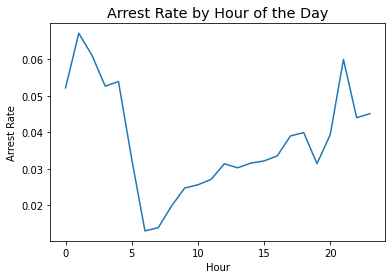

In [35]:
plt.plot(hourly_arrest_rate)
plt.style.use('ggplot')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Hour of the Day')
plt.show()

Are drug related stops on the rise?

In [36]:
ri.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'arrest_made', 'citation_issued', 'warning_issued',
       'outcome', 'contraband_found', 'contraband_drugs', 'contraband_weapons',
       'contraband_alcohol', 'contraband_other', 'frisk_performed',
       'search_conducted', 'search_basis', 'reason_for_search',
       'reason_for_stop', 'vehicle_make', 'vehicle_model', 'raw_BasisForStop',
       'raw_OperatorRace', 'raw_OperatorSex', 'raw_ResultOfStop',
       'raw_SearchResultOne', 'raw_SearchResultTwo', 'raw_SearchResultThree',
       'frisk', 'inventory'],
      dtype='object')

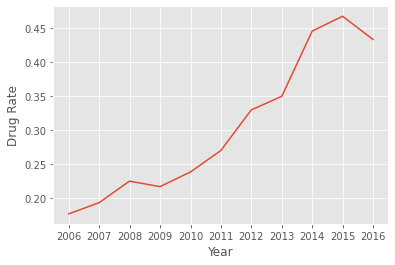

In [37]:
annual_drug_rate = ri.contraband_drugs.resample('A').mean()
plt.plot(annual_drug_rate)
plt.xlabel('Year')
plt.ylabel('Drug Rate')
plt.show()

Between 2009 and 2015 Drug related stops nearly doubled. Let's compate the search rate and the drug rate over the same period 

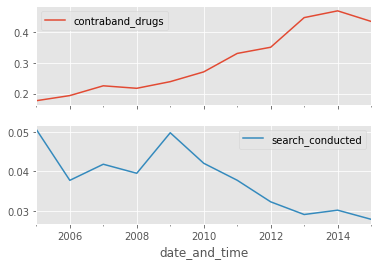

In [38]:
annual_search_rate = ri.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
annual.plot(subplots=True)
plt.show()

Interestingly, the drug related stops increased whilst the overall search rate decreased. Let's now look at what violations are caught in each district?

In [39]:
all_zones = pd.crosstab(ri.zone, ri.reason_for_stop)
k_zones = all_zones.loc['K1': 'K3']
k_zones

reason_for_stop,APB,Call for Service,Equipment/Inspection Violation,Motorist Assist/Courtesy,Other Traffic Violation,Registration Violation,Seatbelt Violation,Special Detail/Directed Patrol,Speeding,Suspicious Person,Violation of City/Town Ordinance,Warrant
zone,,,,,,,,,,,,
K1,32,281,3786,78,7127,628,1,1009,33067,72,21,8
K2,101,1036,11285,118,16440,4056,2897,3539,57500,59,237,13
K3,144,1227,12959,258,16218,3871,3660,2011,68234,68,194,24


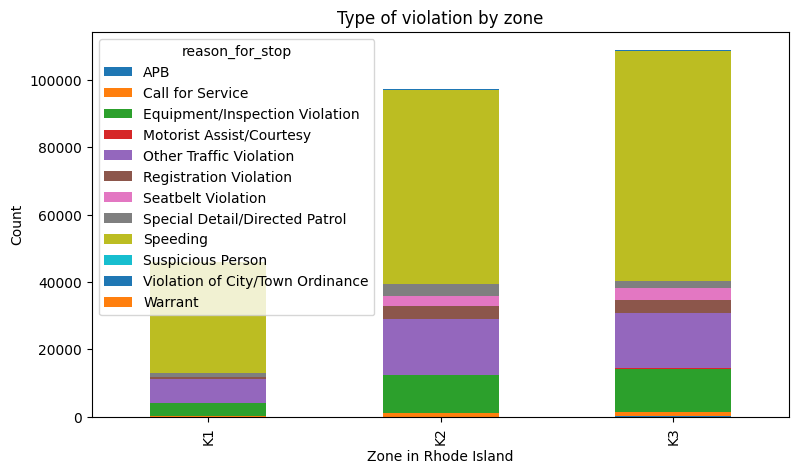

<Figure size 640x480 with 0 Axes>

In [40]:
plt.style.use('default')

k_zones.plot(kind='bar', stacked=True, figsize=(9, 5));
plt.xlabel('Zone in Rhode Island')
plt.title('Type of violation by zone')
plt.ylabel('Count')
plt.show()
plt.clf()


This chart tells us that K3 zone had the largest number of police stops. It also tells us that speeding stops were the overwhelming majority of the reasons for stop. Both other Traffic Violation and Equipement Inspection violation make up large proportions of the police stops.

Let's see which violations have the highest and the lowest search rates. 

Text(0, 0.5, 'Search Rate')

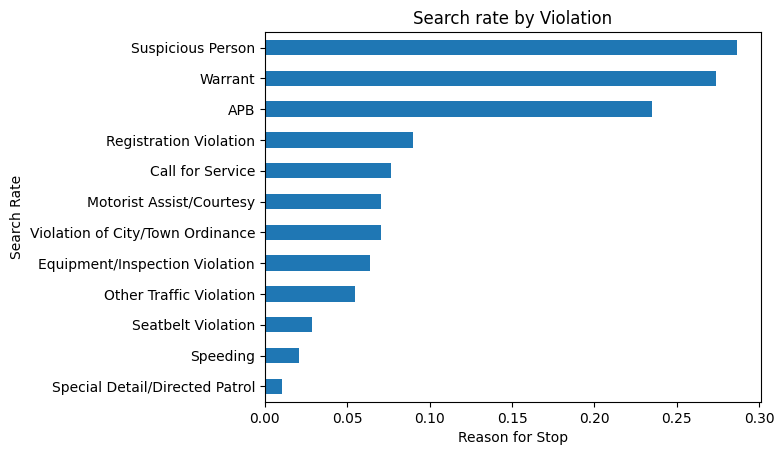

In [41]:
search_rate = ri.groupby('reason_for_stop').search_conducted.mean()
search_rate.sort_values().plot(kind='barh')
plt.xlabel('Reason for Stop')
plt.title('Search rate by Violation')
plt.ylabel('Search Rate')

Finally, let's look at the search rate between genders to see who is more likely to be subject to a police search.

Text(0, 0.5, 'Search rate')

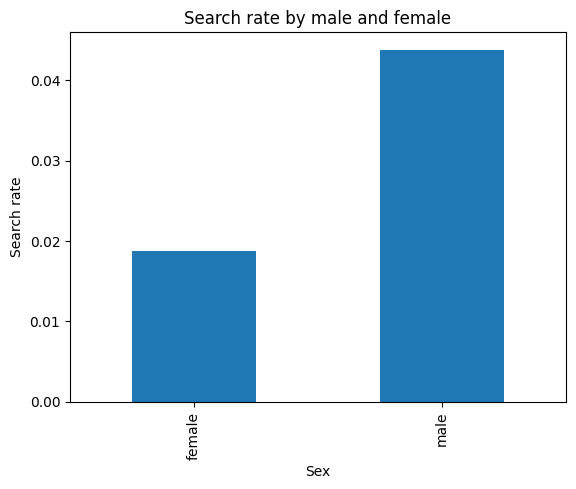

In [46]:
ri.groupby('subject_sex').search_conducted.mean().plot(kind='bar');
plt.title('Search rate by male and female')
plt.xlabel('Sex')
plt.ylabel('Search rate')

From the data, we see that males are over twice as likely to be searched than females. However, we cannot concude that a search is twice as likely if the subject is male. Since there are other factors we need to consider. I'll explore the reason for stop to see if the nature of the violation explains the disparity in search rates betwee males and females. 


In [44]:
ri.groupby(['reason_for_stop', 'subject_sex']).search_conducted.mean()

reason_for_stop                   subject_sex
APB                               female         0.165138
                                  male           0.255319
Call for Service                  female         0.042230
                                  male           0.092419
Equipment/Inspection Violation    female         0.040245
                                  male           0.070916
Motorist Assist/Courtesy          female         0.033133
                                  male           0.089802
Other Traffic Violation           female         0.038021
                                  male           0.059156
Registration Violation            female         0.054700
                                  male           0.103589
Seatbelt Violation                female         0.017746
                                  male           0.031705
Special Detail/Directed Patrol    female         0.018045
                                  male           0.010249
Speeding                  

For males, the search rate is higher across all types of violation. This doesn't show a causal link, although it does show a correlation.

As we don't have any information as to where the traffic stops took place. For example their precise GPS location. The data we will use for our weather information is from the National Centers for Environmental Information and for the state of Rhode Island. As the smallest US state, a single station still will give us a general idea about the weather throughout the state. Let's load in the dataset. 